In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.ndimage as ndi         # qui ci sono i metodi per realizzare i filtri
import skimage.io as io 
import skimage.exposure as exp
import os 
os.chdir('../../')
import my_modules.histogramop as hope
import my_modules.my_lib as lib
import my_modules.seg_utils as seg
import immagini.Immagini.bitop as bit
from skimage.transform import rescale
from skimage.transform import warp

path = 'C:\\Users\\rocco\\Documents\\università\\ESM\\laboratorio\\immagini\\Immagini\\'

In [ ]:
# smoothing - media aritmetica 1

im = path+'test.jpg'

x = np.float64(io.imread(im))
k = 11      #dimensione del kernel
h = np.ones((k,k))/(k**2)             # creazione maschera
y = ndi.correlate(x,h,mode='reflect') # reflect -> trattamento ai bordi simmetrico 

plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y, clim=[0,255], cmap='gray')
plt.show()

In [ ]:
# smoothing - media aritmetica 2

im = path+'test.jpg'

x = np.float64(io.imread(im))
y = ndi.uniform_filter(x, size=10)

plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y, clim=[0,255], cmap='gray')
plt.show()

In [ ]:
# smoothing - sfocatura gaussiana

im = path+'test.jpg'

x = np.float64(io.imread(im))
y = ndi.gaussian_filter(x, 3) # con sigma passa automaticamente anche la dimensione della maschera 

plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y, clim=[0,255], cmap='gray')
plt.show()

In [ ]:
# smoothing + threshholding

'''
Si fissa la soglia. Poi tutto quello che è sotto la soglia, viene posto a zero. Questa è detta operazione di thresholding
'''

im = path+'space.jpg'
x = np.float64(io.imread(im))

# 1 - Visualizza l'immagine 
plt.figure(1)
plt.imshow(x, clim=[0,255], cmap='gray')
plt.show()

# 2 - Calcolo media aritmetica 
k = 15      #dimensione del kernel
h = np.ones((k,k))/(k**2)             # creazione maschera
y = ndi.correlate(x,h,mode='reflect')

plt.figure(2)
plt.imshow(y, clim=[0,255], cmap='gray')

# 3 - operazione di thresholding
max_im = np.max(y)
tsh = 0.25 * max_im 

mask = y<tsh
y = 0*x*mask+(1-mask)*x

'''
ATTENZIONE!!!
La maschera va applicata all'immagine originale, l'immagine filtrata serve solo per definire la maschera
'''

plt.figure(3)
plt.imshow(y, clim=[0,255], cmap='gray')



In [ ]:
# denoising 

im = path+'lena.jpg'
x = np.float64(io.imread(im))

M,N = x.shape
d = 25
n = d * np.random.randn(M,N) # randn -> crea una distribuzione normale (gaussiana)

''''
Questa trasformazione ci permette di ottenere una distribuzione di probabilità con dev.std pari a d e media pari a 0
'''
y = x+n


# filtraggio per pulire il rumore
z = ndi.uniform_filter(y, (10,10))
mse = np.mean((x-y)**2)
print(mse) # controlla al variare del filtraggio come varia il mse

plt.close('all')
plt.figure(1)
plt.subplot(1,4,1)
plt.imshow(x, clim=None, cmap='gray')
plt.subplot(1,4,2)
plt.imshow(n, clim=None, cmap='gray')
plt.subplot(1,4,3)
plt.imshow(y,clim=None, cmap='gray')
plt.subplot(1,4,4)
plt.subplot(z, clim=None, cmap='gray')

In [ ]:
# denoising spaziale adattativo

'''
Posso esaminare il contrasto con l'immagine:
se la varianza è alta, sto esaminando un bordo. Voglio filtrare solo dove ci sono i bordi.

OSSERVAZIONE:
generic filter lavora su i blocchetti

dobbiamo calcolare la matrice delle medie locali, la matrice delle varianze locali, la varianza globale
'''

im = path+'lena.jpg'
x = np.float64(io.imread(im))

M,N = x.shape
d = 25
n = d * np.random.randn(M,N) # randn -> crea una distribuzione normale (gaussiana)
noisy = x+n
k=7
var_loc = ndi.generic_filter(noisy, np.var, (k,k))
mean_loc = ndi.generic_filter(noisy, np.mean, (k,k))

y = noisy - (d**2)*(noisy-mean_loc)/var_loc

mse = np.mean((x-y)**2)
print(f'MSE:\t{mse}') # è molto più basso rispetto a prima 


In [ ]:
# filtri di sharpening 

im = path+'luna.jpg'

x = np.float64(io.imread(im))
plt.figure(1)
plt.imshow(x, clim=[0,255], cmap='gray')
h = np.array([[0,1,0], [1,-4,1], [0,1,0]])
h1 = np.array([[0,-1,0], [-1,4,-1], [0,-1,0]]) # concettualmente dicono la stessa cosa, abbiamo l'inversioe bianco-nero

y = ndi.correlate(x,h) #la maschera è simmetrica 
z = ndi.convolve(x,h1)

plt.figure(2)
plt.imshow(z, clim=None, cmap='gray') # serve togliere clim perchè in generale i bordi non rispetteranno la dinamica originale
plt.colorbar()


j = x+z # immagine enhanched
plt.figure(3)
plt.imshow(j, clim=None, cmap='gray') # serve togliere clim perchè in generale i bordi non rispetteranno la dinamica originale
plt.colorbar()


In [ ]:
# point detection

im = path+'turbina.jpg'

x = np.float64(io.imread(im))
h = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
y = ndi.correlate(x,h)
z = np.abs(y)
th = 0.9 * np.max(z)
mask = z<th # 1 ovunque, tranne dove c'è il pixel nero

plt.close('all')
plt.figure(1)
plt.imshow(x, clim=[0,255], cmap='gray')
plt.figure(2)
plt.imshow(y, clim=None, cmap='gray')
plt.colorbar()
plt.title('post filter')
plt.figure(3)
plt.imshow(z, clim=None, cmap='gray_r')
plt.colorbar()
plt.title('post filter abs')
plt.figure(4)
plt.imshow(mask, clim=None, cmap='gray')
plt.colorbar()
plt.title('maskera')

In [ ]:
# line detection

im = path + 'quadrato.jpg'
x = np.float64(io.imread(im))

h1 = np.array([[-1,-1,-1], [2,2,2], [-1,-1,-1]])
h2 = np.array([[-1,-1,2], [-1,2,-1],[2,-1,-1]])
h3 = np.array([[-1,2,-1], [-1,2,-1],[-1,2,-1]])
h4 = np.array([[2,-1,-1], [-1,2,-1],[-1,-1,2]])

y1 = np.abs(ndi.correlate(x,h1))
y2 = np.abs(ndi.correlate(x,h2))
y3 = np.abs(ndi.correlate(x,h3))
y4 = np.abs(ndi.correlate(x,h4))

th1 = 0.9*np.max(y1)
th2 = 0.9*np.max(y2)
th3 = 0.9*np.max(y3)
th4 = 0.9*np.max(y4)

mask1 = y1<th1
mask1 = y1<th1
mask1 = y1<th1
mask1 = y1<th1

plt.figure(1)
plt.imshow(x, clim=None, cmap='gray')
plt.title('originale')

plt.figure(2)
plt.subplot(1,4,1)
plt.imshow(y1, clim=None, cmap='gray')
plt.subplot(1,4,2)
plt.imshow(y2, clim=None, cmap='gray')
plt.subplot(1,4,3)
plt.imshow(y3, clim=None, cmap='gray')
plt.subplot(1,4,4)
plt.imshow(y4, clim=None, cmap='gray')

# in che modo si possono mettere insieme le immagini che hanno tutte e 4 le informazioni?
# posso creare una nuova immagine che prenda per ogni pixel il massimo valore di ognuna delle 4 immagini

# creiamo una stack di 4 immagini (tensore)

z = np.stack((y1,y2,y3,y4),2) # 2 perchè [0,1,2] voglio stackare le immagini lungo la terza dimensione
z = np.max(z, 2) # prendi il massimo sull'ultima dimensione
plt.figure(3)
plt.imshow(z, clim=None, cmap='gray_r')



In [ ]:
# edge detection basata sul gradiente - maschere di sobel verticali

im = path + 'house.y'   # dimensioni 512x512

x = np.fromfile(im, np.uint8)
x = np.reshape(x, (512,512))
x = np.float32(x)

sobel1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

y1 = ndi.correlate(x, sobel1, mode='reflect')
y2 = ndi.correlate(x, sobel2, mode='reflect')
grad = np.sqrt((y1**2)+(y2**2))

th = 1.5*np.mean(grad)
mask = grad < th


plt.close('all')
plt.figure(1)
plt.imshow(x, clim=[0,255], cmap='gray')
plt.colorbar()
plt.title('originale')

plt.figure(2)
plt.imshow(grad, clim=None, cmap='gray')
plt.colorbar()
plt.title('grad')

plt.figure(3)
plt.imshow(mask, clim=[0,1], cmap='gray')
plt.colorbar()
plt.title('maschera')

In [ ]:
# edge detection basata sul gradiente - maschere di sobel oblique

im = path + 'angiogramma.jpg'
x = np.float32(io.imread(im))

x_filtered = ndi.gaussian_filter(x, 4)
h1 = np.array([[0,1,2],[-1,0,1],[-2,-1,0]])
h2 = np.array([[-2,-1,0],[-1,0,1],[0,1,2]])

y1 = ndi.correlate(x, h1, mode='reflect')
y2 = ndi.correlate(x, h2, mode='reflect')

y1_filtered = ndi.correlate(x_filtered, h1, mode='reflect')
y2_filtered = ndi.correlate(x_filtered, h2, mode='reflect')

grad = np.sqrt((y1**2)+(y2**2))
grad_filtered = np.sqrt((y1_filtered**2)+(y2_filtered**2))

th = 1.5*np.mean(grad_filtered)
map = grad_filtered > th

plt.close('all')
plt.figure(1)
plt.imshow(x, clim=[0,255], cmap='gray')
plt.title('originale')
plt.figure(2)
plt.imshow(grad, clim=None, cmap='gray')
plt.colorbar()
plt.title('gradiente')
plt.figure(3)
plt.imshow(grad_filtered, clim=None, cmap='gray')
plt.colorbar()
plt.title('gradiente filtrato')
plt.figure(4)
plt.imshow(map, clim=[0,1], cmap='gray_r')
plt.title('mappa')

# questa è edge detection di basso livello. Per quella di alto livello, che vedremo in seguito, riusciremo ad evidenziare solo le features di interesse. 




In [ ]:
# filtro laplaciano di gaussiana 

im = path + 'angio.16bit.png'
x = np.float32(io.imread(im))
s = 5
y = ndi.gaussian_laplace(x, (s,s))
z = seg.zero_crossing(y)

plt.close('all')
plt.figure(1)
plt.imshow(x, clim=None, cmap='gray')
plt.colorbar()
plt.title('originale')
plt.figure(2)
plt.imshow(y, clim=None, cmap='gray')
plt.title('Gaussain Laplace Filter')
plt.figure(3)
plt.imshow(z, clim=[0,1], cmap='gray_r')
plt.title('Map zero crossing') # spaghetti effect

Text(0.5, 1.0, 'originale_rumorosa')

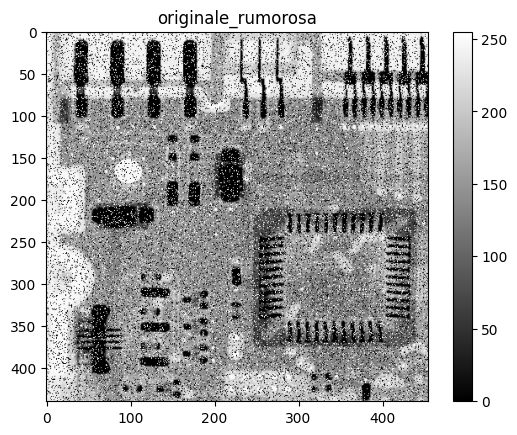

In [ ]:
# filtraggio non lineare
im = path + 'circuito_rumoroso.jpg'
x = np.float32(io.imread(im))

y = ndi.generic_filter(x, np.median, (5,5))
plt.close('all')
plt.figure(1)
plt.imshow(x, clim=[0,255], cmap='gray') # immagine S&P
plt.colorbar()
plt.title('originale_rumorosa')
plt.figure(2)
plt.imshow(y, clim=None, cmap='gray')
plt.title('after median filter')
